In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/task1/dataset.csv', encoding='cp1251')

In [2]:
stops = pd.read_csv('data/task1/stop.csv')

In [3]:
pd.set_option('display.max_colwidth', 200)

In [7]:
df.head().T

,0,1,2,3,4
date,2017-01-01 00:00:10,2017-01-01 00:00:20,2017-01-01 00:00:30,2017-01-01 00:00:40,2017-01-01 00:00:50
RF.21304.Ток...213MII904A,NaN,NaN,NaN,NaN,NaN
S.C.ВПУСК.ПП.ДАВЛ...214PI226AA,14.88,14.88,14.87,14.89,14.88
S.C.ВПУСК.ПП.ДАВЛ...214PI226AB,14.86,14.84,14.82,14.87,14.83
S.C.ВПУСК.ПП.ТЕМП...214TI232A,256.1,256,256,256.1,256.1
SPEED.CONTROLLER...250MSIC001.PV,0,0,0,0,0
XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV,NaN,NaN,NaN,NaN,NaN
ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A,0.5277,0.5277,0.5277,0.5277,0.5277
ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981,NaN,NaN,NaN,NaN,NaN
Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A,52,52,52,52,52


In [8]:
df.date = pd.to_datetime(df.date, infer_datetime_format=True)

In [6]:
df.to_hdf('data/task1/data.h5', key='df', mode='w')

In [6]:
%time df = pd.read_hdf('data/task1/data.h5', 'df')

CPU times: user 124 ms, sys: 1.82 s, total: 1.95 s
Wall time: 3.53 s


In [9]:
print( 'min/max date: %s / %s' % (df.date.min().date(), df.date.max().date()))
print('Number of days: %d' % ((df.date.max() - df.date.min()).days + 1))
print('shape: %d rows' % df.shape[0])


min/max date: 2017-01-01 / 2018-03-30
Number of days: 454
shape: 4068179 rows


In [10]:
pd.Series(np.diff(df.date)).sort_values().head()

3300478   -17 days +03:30:10
0            0 days 00:00:10
2712112      0 days 00:00:10
2712113      0 days 00:00:10
2712114      0 days 00:00:10
dtype: timedelta64[ns]

Какой-то сдвиг на 17 дней.

In [11]:
df.iloc[3300477:3300481]

,date,RF.21304.Ток...213MII904A,S.C.ВПУСК.ПП.ДАВЛ...214PI226AA,S.C.ВПУСК.ПП.ДАВЛ...214PI226AB,S.C.ВПУСК.ПП.ТЕМП...214TI232A,SPEED.CONTROLLER...250MSIC001.PV,XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV,ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A,ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981,Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A,...,ЦИЛ..3.ТЕМП.УПР...214TIC207A,ЦИЛ..4.ТЕМП.УПР...214TIC208A,ЦИЛ..5.ТЕМП.УПР...214TIC209A,ЦИЛ..6.ТЕМП.УПР...214TIC210A,ЦИЛ..7.ТЕМП.УПР...214TIC211A,ЦИЛ..8.ТЕМП.УПР...214TIC212A,ЦИЛ..9.ТЕМП.УПР...214TIC213A,ЭКСТР.ДВИГ.ВЛАСТЬ...214JI200A,ЭКСТР.ДВИГ.ПОТОК...214II200A,H2.C3..КОНТР.СООТН...212AIC008.PV
3300477,2018-01-17 23:59:40,5.0,NaN,NaN,NaN,NaN,34.006042,NaN,454.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.000000,2.762603
3300478,2018-01-17 23:59:50,5.1,NaN,NaN,NaN,NaN,34.019382,NaN,454.300018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.300018,2.762603
3300479,2018-01-01 03:30:00,5.0,12.139999,12.58,257.200012,0.0,29.643192,0.5518,382.700012,49.0,...,149.0,235.000000,220.0,215.0,186.600006,185.300003,185.0,5430.0,329.899994,2.665772
3300480,2018-01-01 03:30:10,5.0,12.090000,12.54,257.100006,0.0,29.637890,0.5518,382.300018,49.0,...,149.0,235.100006,220.0,215.0,186.500000,185.400009,185.0,5430.0,329.600006,2.665772


С этого момента заканчиваются NaN

In [12]:
pd.Series(np.diff(df.date.sort_values())).value_counts()

00:00:10    3922558
00:00:00     145620
dtype: int64

In [13]:
df.iloc[3300477-145620-10:3300481-145620]

,date,RF.21304.Ток...213MII904A,S.C.ВПУСК.ПП.ДАВЛ...214PI226AA,S.C.ВПУСК.ПП.ДАВЛ...214PI226AB,S.C.ВПУСК.ПП.ТЕМП...214TI232A,SPEED.CONTROLLER...250MSIC001.PV,XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV,ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A,ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981,Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A,...,ЦИЛ..3.ТЕМП.УПР...214TIC207A,ЦИЛ..4.ТЕМП.УПР...214TIC208A,ЦИЛ..5.ТЕМП.УПР...214TIC209A,ЦИЛ..6.ТЕМП.УПР...214TIC210A,ЦИЛ..7.ТЕМП.УПР...214TIC211A,ЦИЛ..8.ТЕМП.УПР...214TIC212A,ЦИЛ..9.ТЕМП.УПР...214TIC213A,ЭКСТР.ДВИГ.ВЛАСТЬ...214JI200A,ЭКСТР.ДВИГ.ПОТОК...214II200A,H2.C3..КОНТР.СООТН...212AIC008.PV
3154847,2018-01-01 03:28:00,5.1,NaN,NaN,NaN,NaN,29.569832,NaN,382.899994,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328.500000,2.665772
3154848,2018-01-01 03:28:10,4.9,NaN,NaN,NaN,NaN,29.560028,NaN,383.100006,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328.100006,2.665772
3154849,2018-01-01 03:28:20,5.0,NaN,NaN,NaN,NaN,29.564281,NaN,383.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331.500000,2.665772
3154850,2018-01-01 03:28:30,4.9,NaN,NaN,NaN,NaN,29.607862,NaN,382.399994,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,326.300018,2.665772
3154851,2018-01-01 03:28:40,4.9,NaN,NaN,NaN,NaN,29.617661,NaN,383.600006,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328.700012,2.665772
3154852,2018-01-01 03:28:50,4.9,NaN,NaN,NaN,NaN,29.609415,NaN,383.100006,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331.399994,2.665772
3154853,2018-01-01 03:29:00,5.0,NaN,NaN,NaN,NaN,29.622721,NaN,382.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329.899994,2.665772
3154854,2018-01-01 03:29:10,5.0,NaN,NaN,NaN,NaN,29.613651,NaN,382.100006,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331.200012,2.665772
3154855,2018-01-01 03:29:20,4.9,NaN,NaN,NaN,NaN,29.628878,NaN,382.700012,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333.000000,2.665772
3154856,2018-01-01 03:29:30,5.0,NaN,NaN,NaN,NaN,29.629499,NaN,382.800018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.800018,2.665772


Здесь начинаются дупликаты(03:30). Но Наны начались еще до этого

In [14]:
duplicate_dates = df.date.value_counts()[:145620].index

In [15]:
duplicate_dates.min(), duplicate_dates.max()

(Timestamp('2018-01-01 03:30:00'), Timestamp('2018-01-17 23:59:50'))

In [16]:
df[df.date > pd.Timestamp('2018-01-17 23:59:50')].isnull().any().value_counts()

False    44
dtype: int64

In [17]:
df.columns

Index(['date', 'RF.21304.Ток...213MII904A', 'S.C.ВПУСК.ПП.ДАВЛ...214PI226AA',
       'S.C.ВПУСК.ПП.ДАВЛ...214PI226AB', 'S.C.ВПУСК.ПП.ТЕМП...214TI232A',
       'SPEED.CONTROLLER...250MSIC001.PV',
       'XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV',
       'ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A', 'ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981',
       'Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A', 'ЕХ21401.АЕ01.MFR...214AI200A',
       'НАГНЕТАНИЕ.В.EX.21401...250PI001',
       'ПОЛОЖ.НОЖА..ГРАНУЛЯТОРА...214ZI211A', 'ПОЛОЖ.ЩЕЛ.ДИСКА...214ZI202A',
       'РАСХОД.В....EX.21401...250FIC001.PV', 'РАСХОД.ЛИНИИ.P.W...214FI205A',
       'СЕКТ.ПИТАТЕЛЬ.RF21304...213MSIC904.PV', 'СПЕЦ.ЭНЕРГИЯ...214JYY200A',
       'ТЕМП.ЛИН.Г.В..ДР.ЛИН....214TI247A',
       'ТЕМП.ЛИН.Г.В..ЛИН.РАЗ....214TI246A', 'ТЕМП.ФИЛЬЕРЫ...214TI235A',
       'ТЕМП.ЩЕЛ.ДИСК.УПР...214TIC214A', 'ТЕМПЕРАТУРА.EX.21401...250TI004',
       'ТЕМПЕРАТУРА.ОБОРОТН.ВОДЫ...250TIC003.PV',
       'ТОК.ДВИГ.ГРАНУЛЯТ...214II217A', 'УПРАВЛЕНИЕ..P.25001A...250HIC001A',
  

In [ ]:
for ind in df.columns:
    print('>>> {}'.format(ind))
    print(df[df.date < pd.Timestamp('2018-01-01 03:30:00')][ind].isnull().value_counts())

>>> date
False    3154859
Name: date, dtype: int64
>>> RF.21304.Ток...213MII904A
False    3077099
True       77760
Name: RF.21304.Ток...213MII904A, dtype: int64
>>> S.C.ВПУСК.ПП.ДАВЛ...214PI226AA
False    3149280
True        5579
Name: S.C.ВПУСК.ПП.ДАВЛ...214PI226AA, dtype: int64
>>> S.C.ВПУСК.ПП.ДАВЛ...214PI226AB
False    3149280
True        5579
Name: S.C.ВПУСК.ПП.ДАВЛ...214PI226AB, dtype: int64
>>> S.C.ВПУСК.ПП.ТЕМП...214TI232A
False    3149280
True        5579
Name: S.C.ВПУСК.ПП.ТЕМП...214TI232A, dtype: int64
>>> SPEED.CONTROLLER...250MSIC001.PV
False    3144960
True        9899
Name: SPEED.CONTROLLER...250MSIC001.PV, dtype: int64
>>> XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV
False    3077099
True       77760
Name: XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV, dtype: int64
>>> ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A
False    3149280
True        5579
Name: ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A, dtype: int64
>>> ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981
False    3077099
True       77760
Name: ДВИГАТЕЛЬ.ГРАНУЛЯТОР

In [ ]:
9899-5579

In [ ]:
79020-77760

- 77760 - пропущены в начале + 1 в районе 1.7кк
- 5579 - 3кк + 1 в райноне 2.4кк
- 9899 - 3кк + 1 в райноне 2.4кк + 1 в районе 0.8кк

In [ ]:
for col in df.columns:
    plt.title(col)
    plt.plot(df[df.date < pd.Timestamp('2018-01-17 23:59:50')][col].isnull())
    plt.show()

NaN похоже имеет смысл. Строки после 3кк с нанами вероятно нужно будет удалить, так как для них есть значения без нана для той же даты. 

Остальные пожалуй лучше заполнить какими-нибудь выбросами, например 999, так как вероятно они имеют смысл, который может коррелировать с таргетом

Есть еще НАНы в начале, может будет лучше их просто удалить или заменить на среднее, так как вероятнее всего, они просто не замерялись.

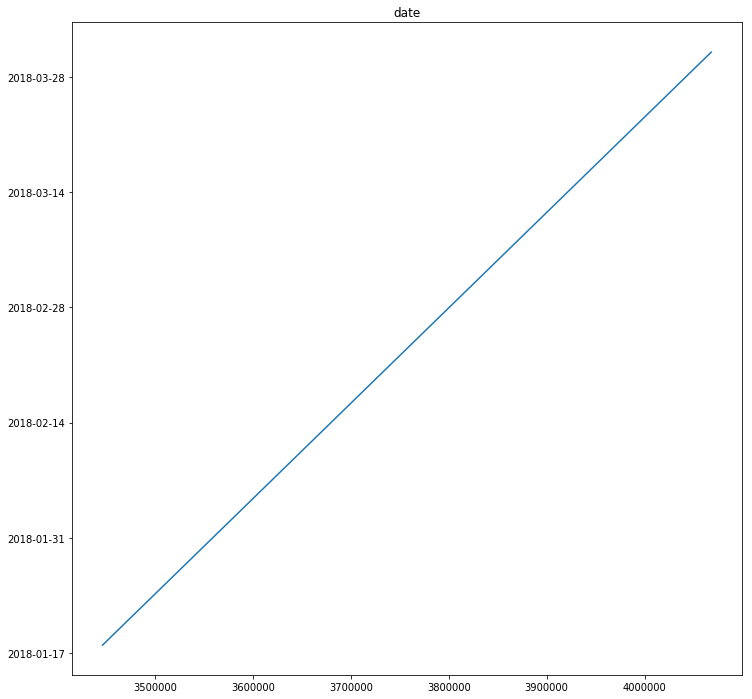

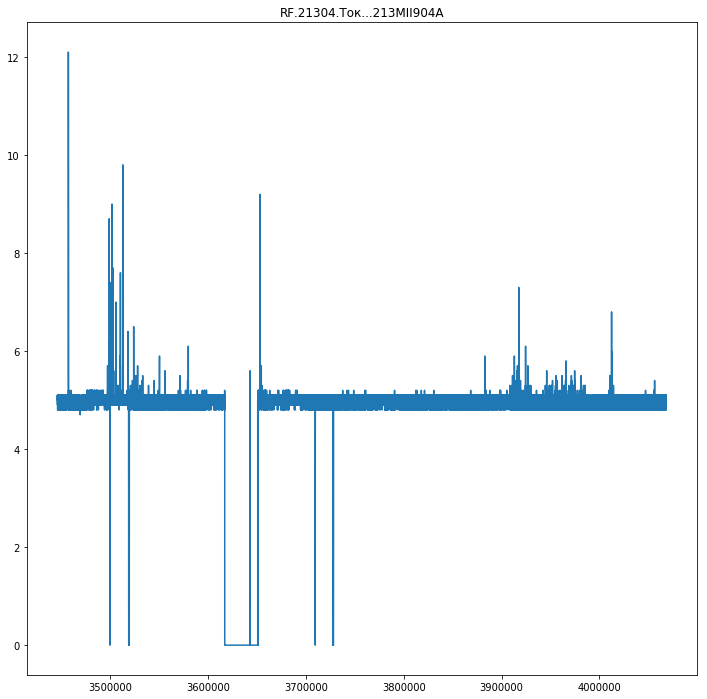

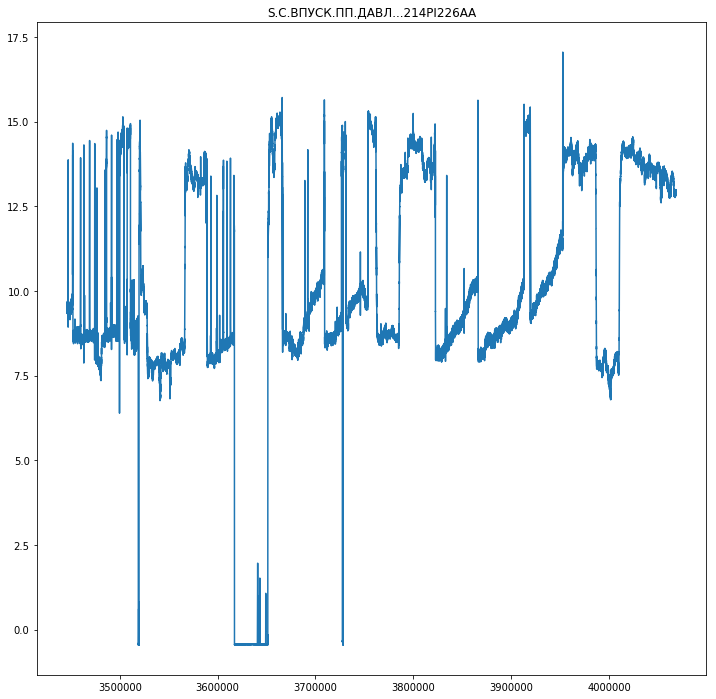

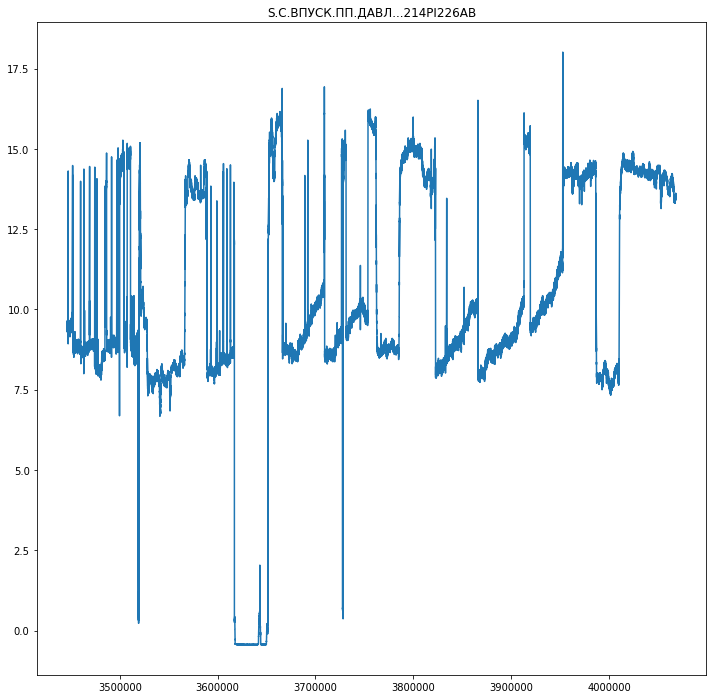

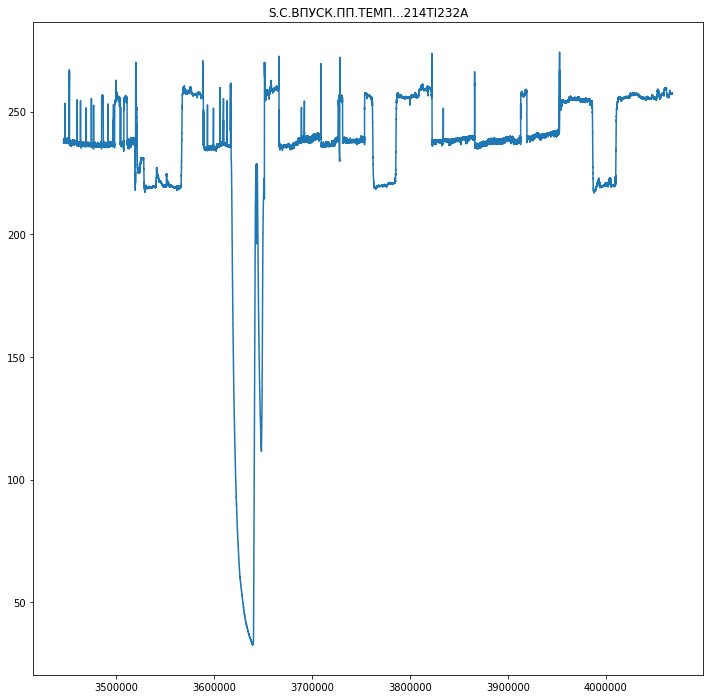

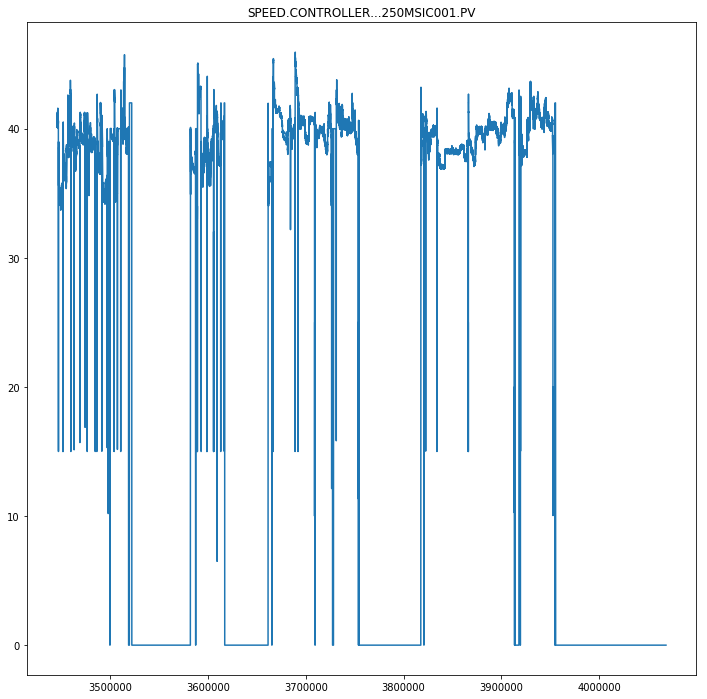

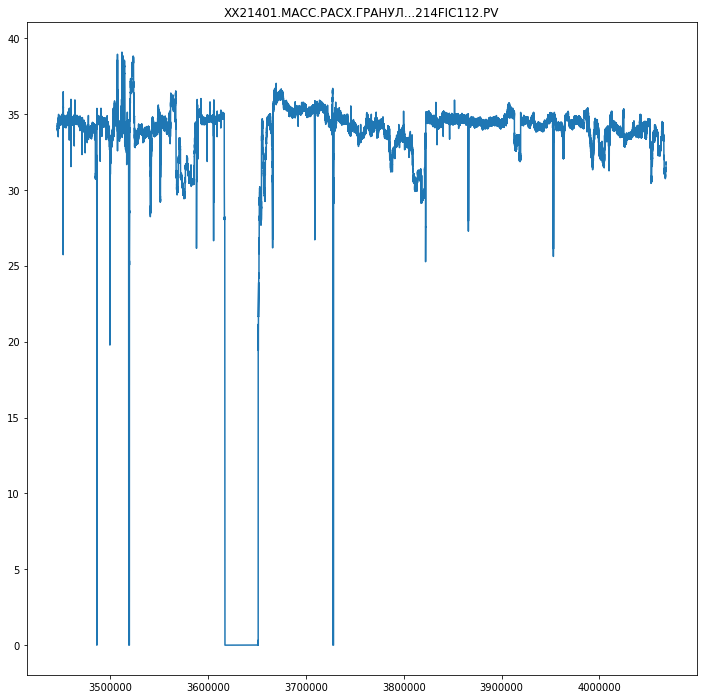

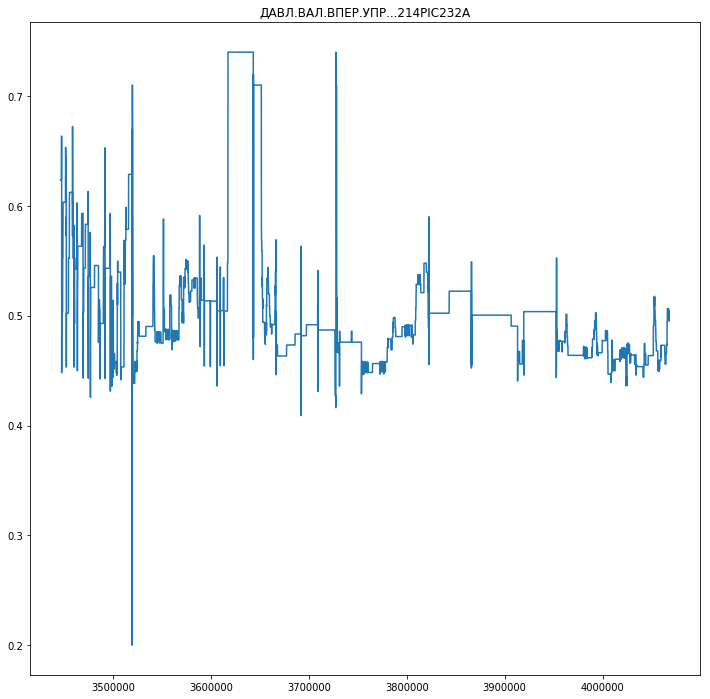

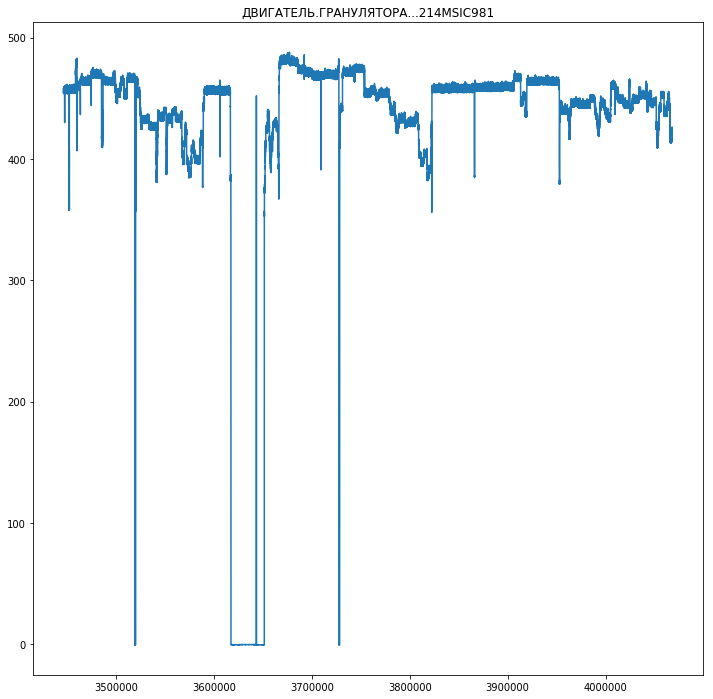

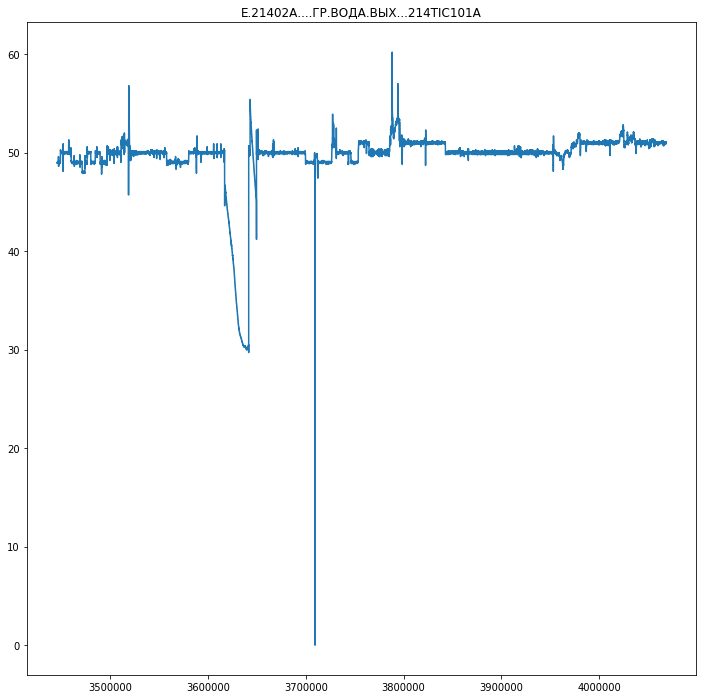

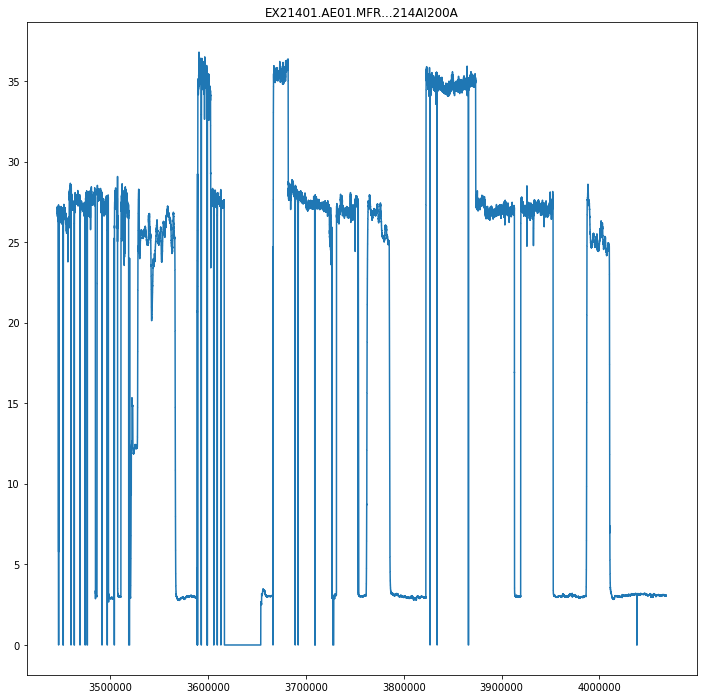

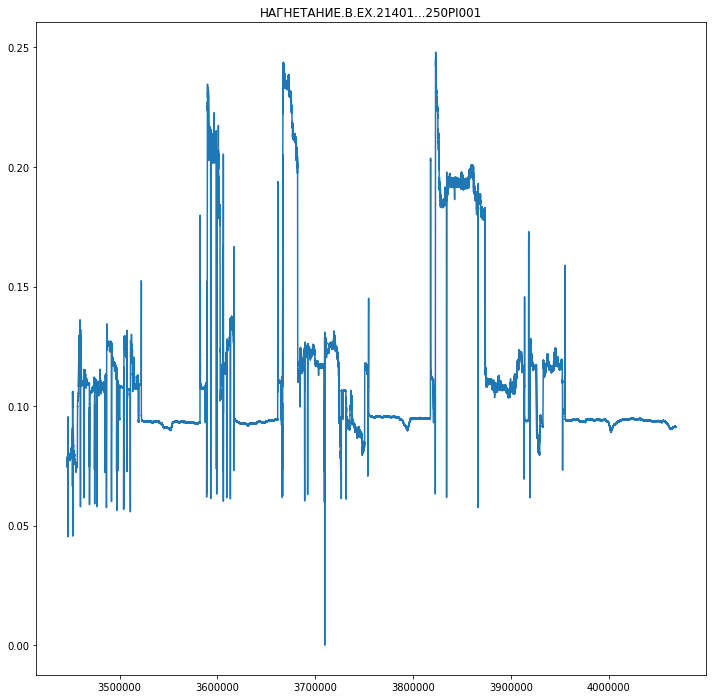

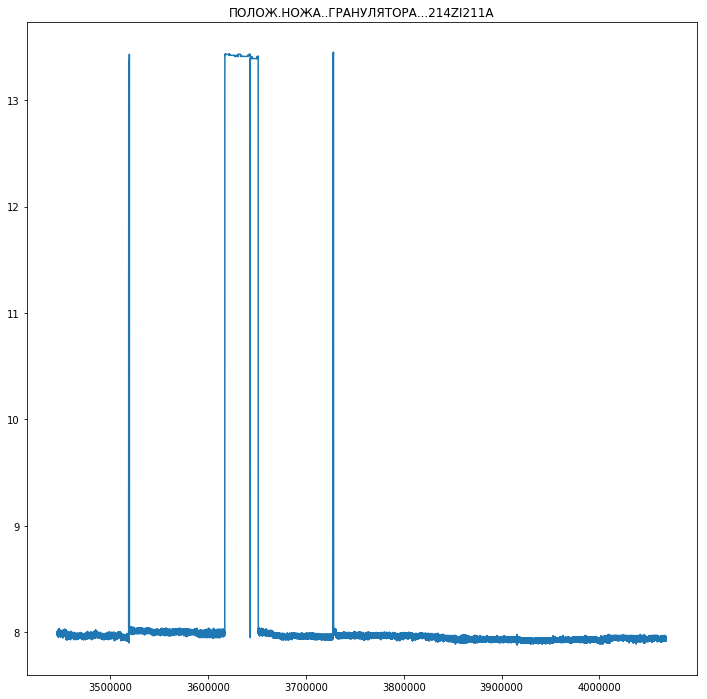

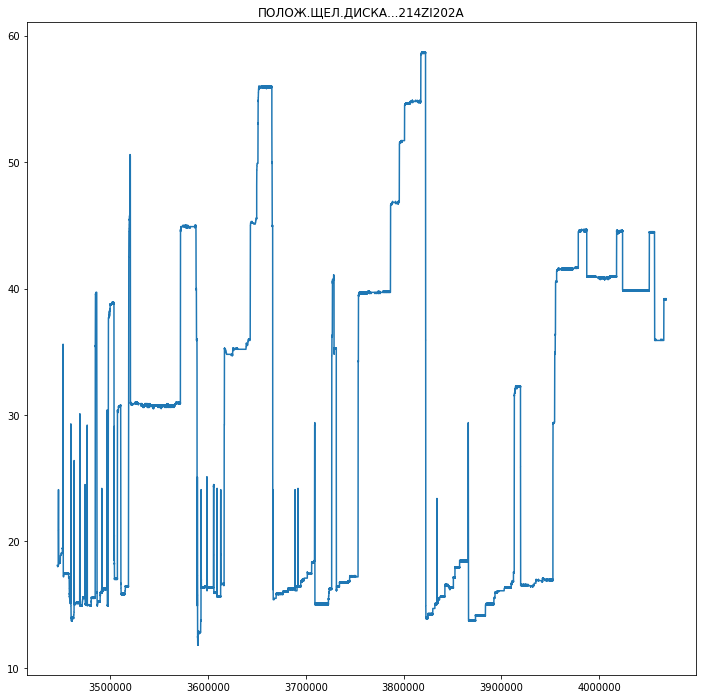

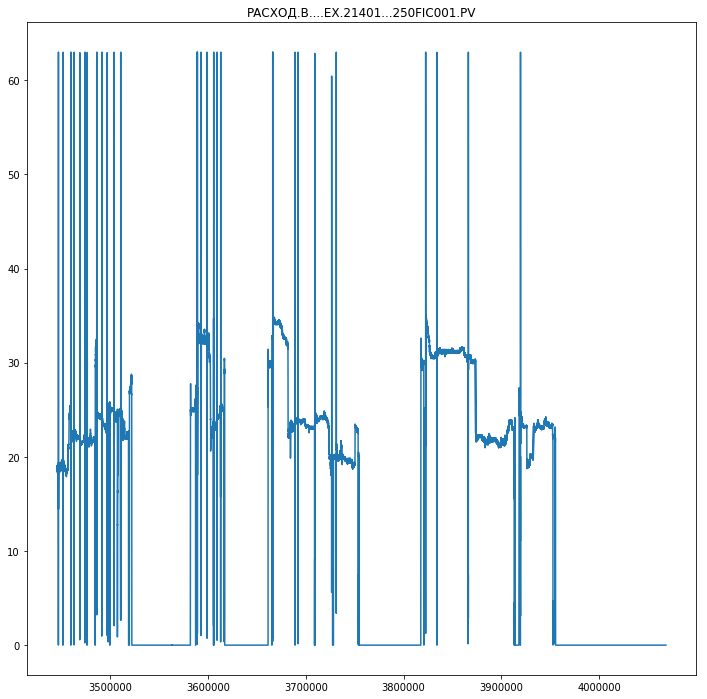

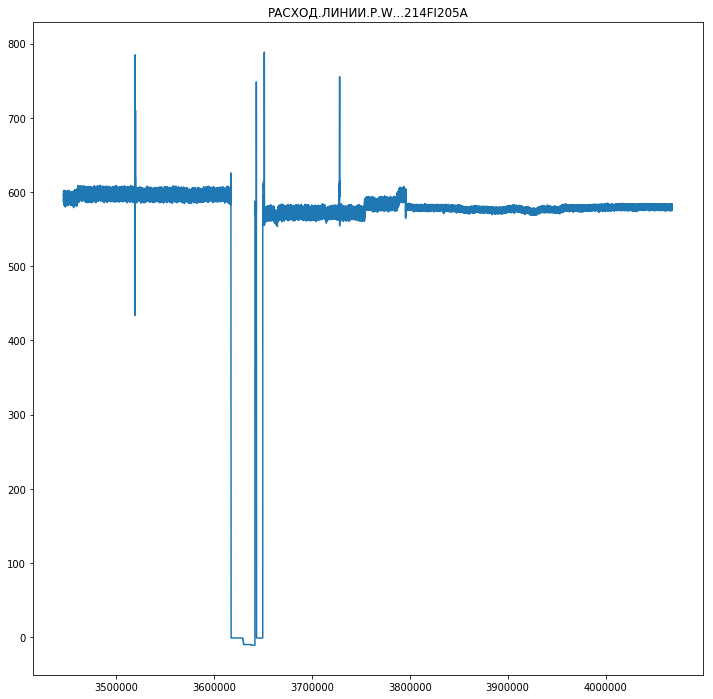

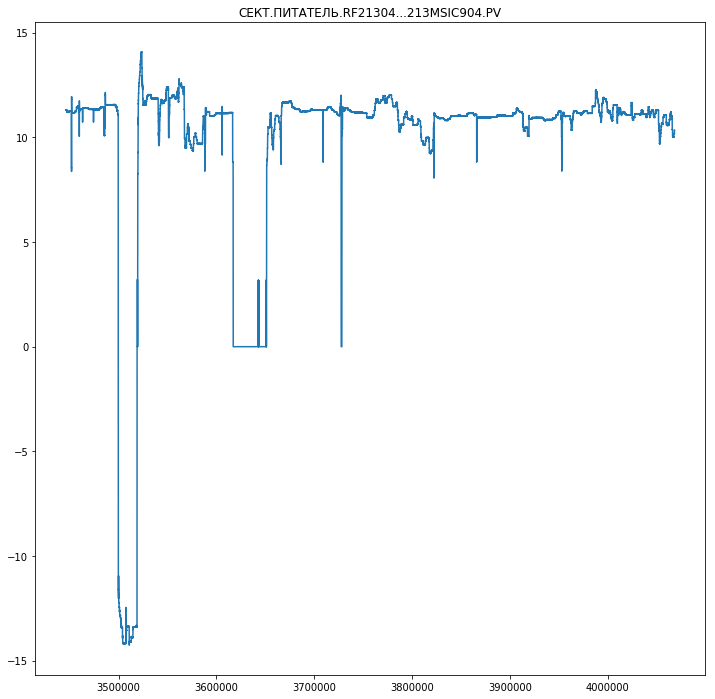

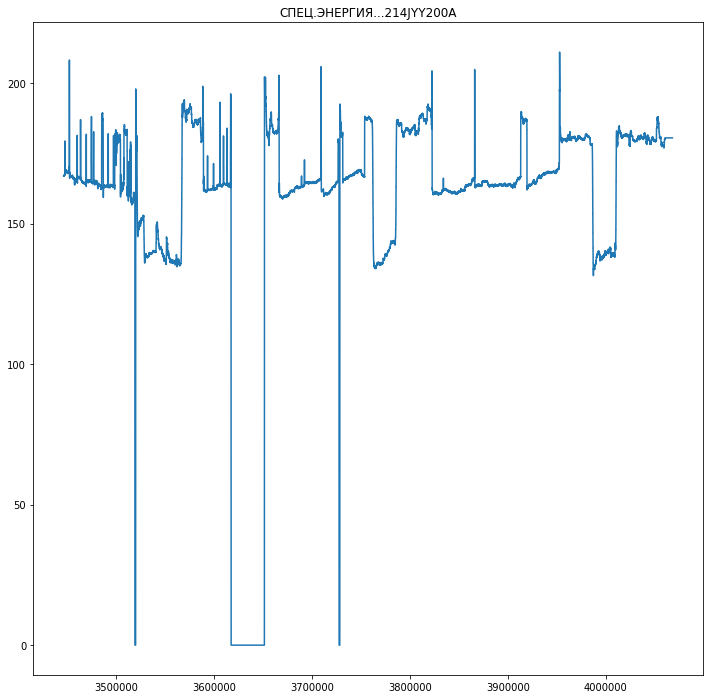

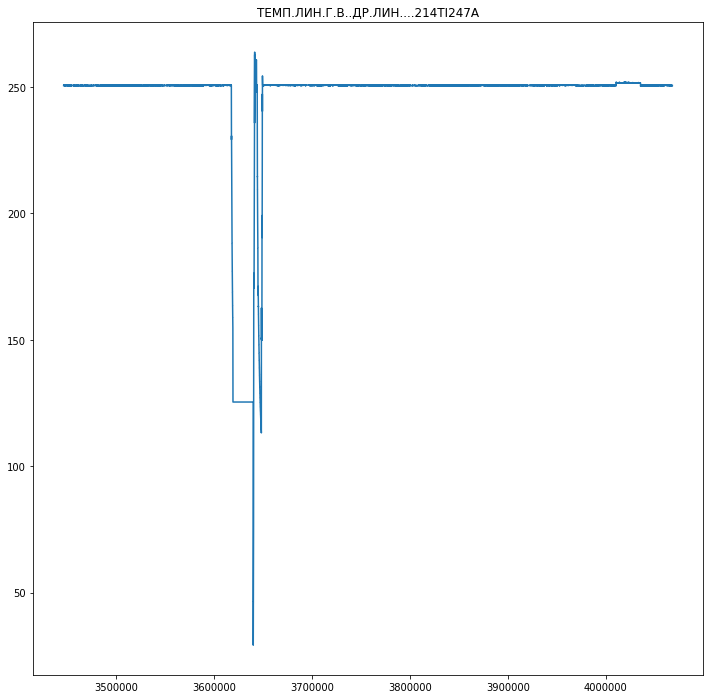

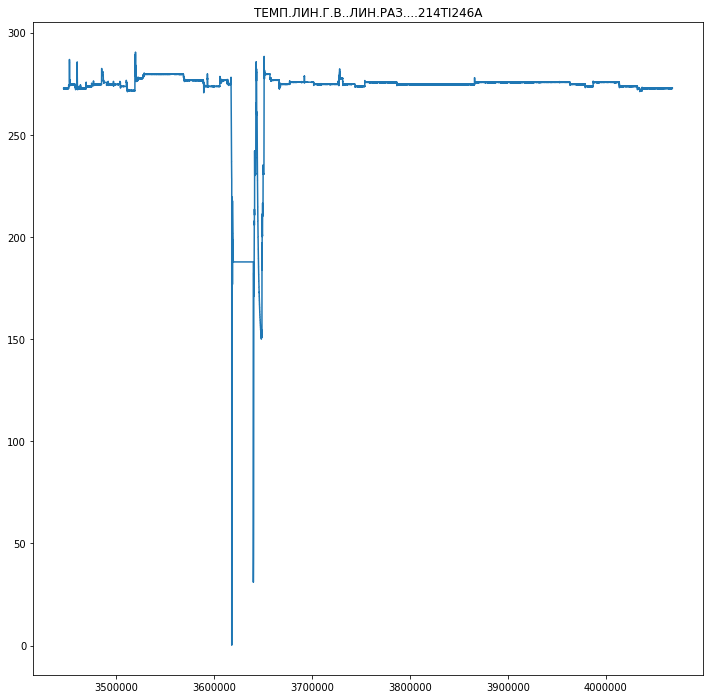

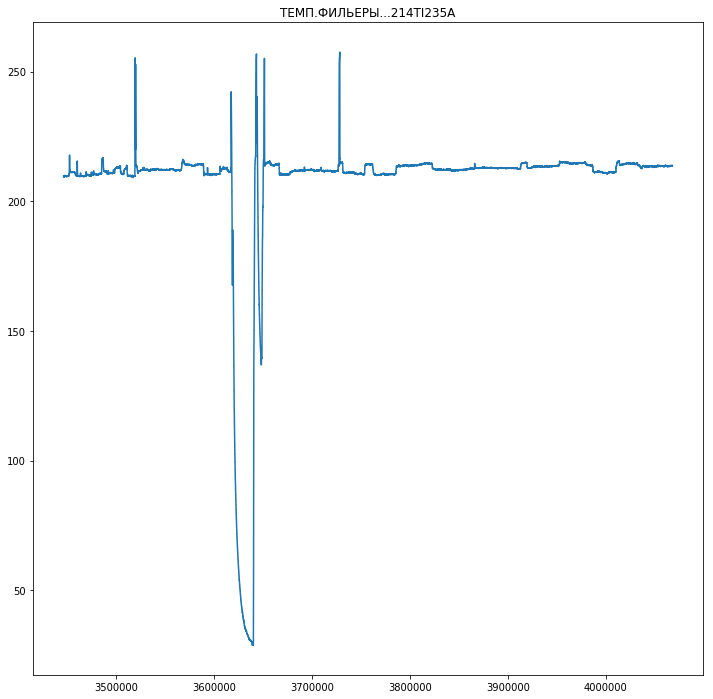

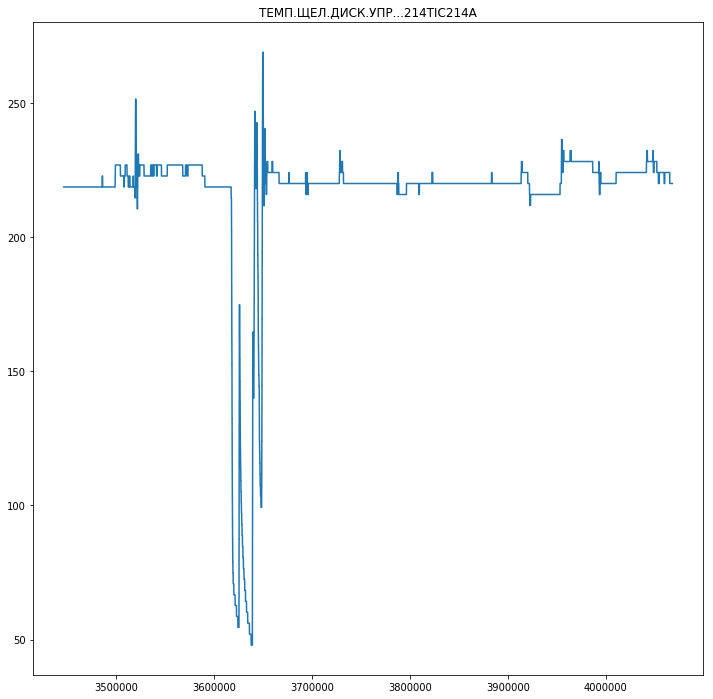

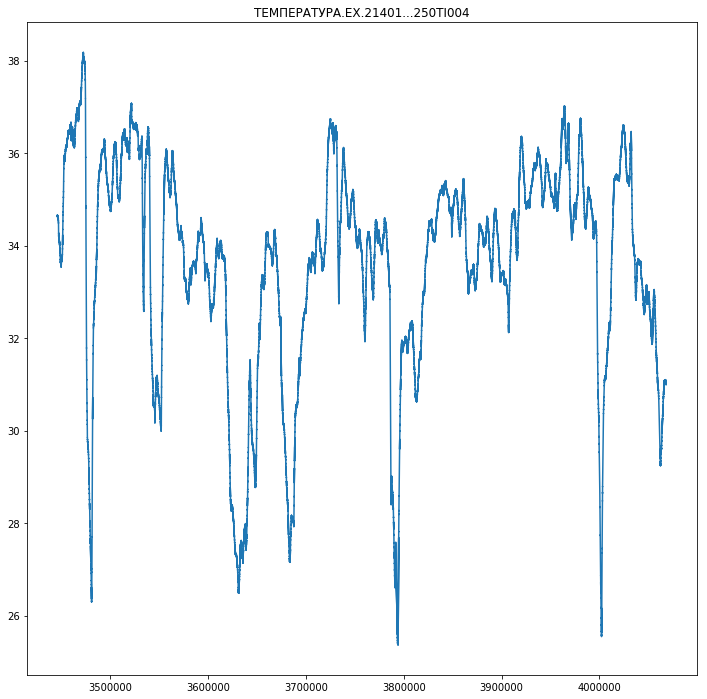

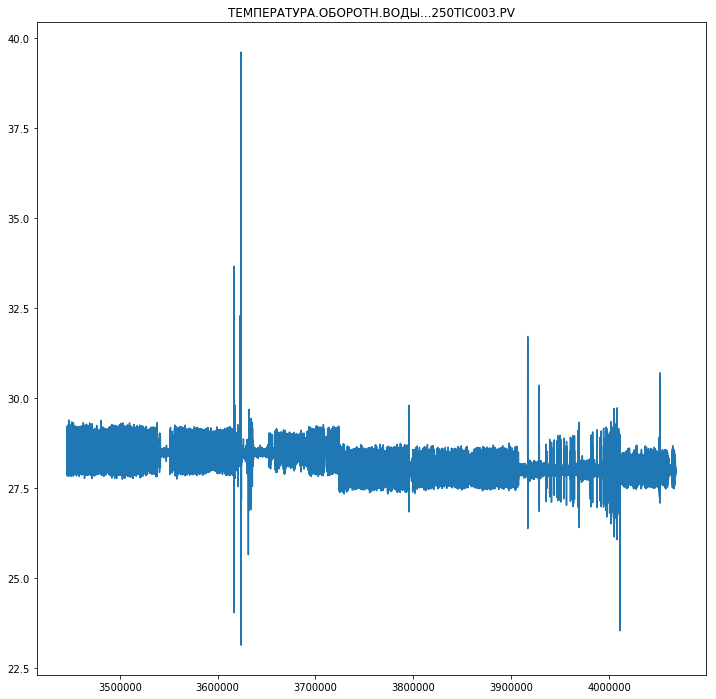

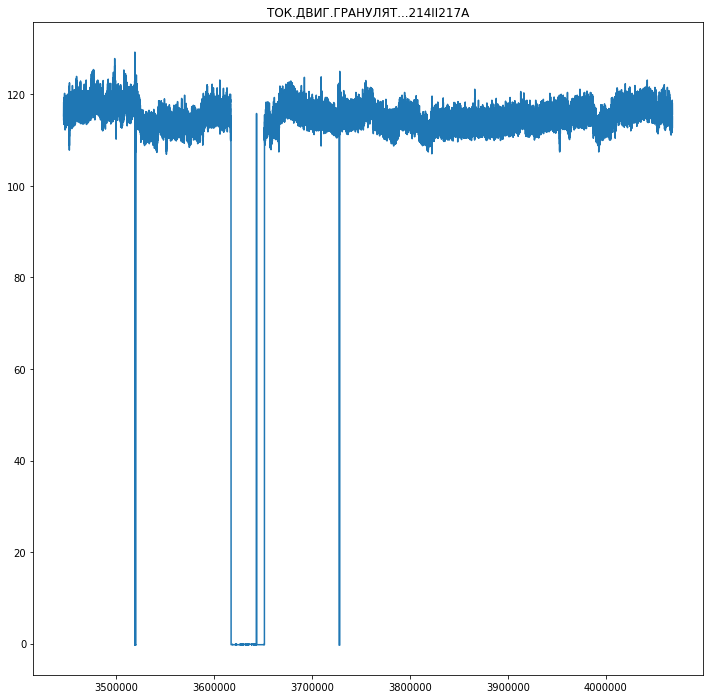

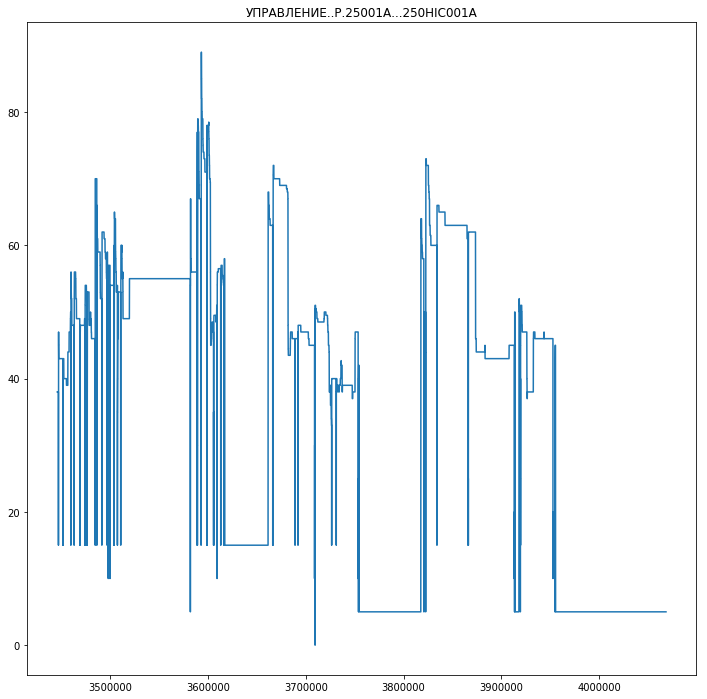

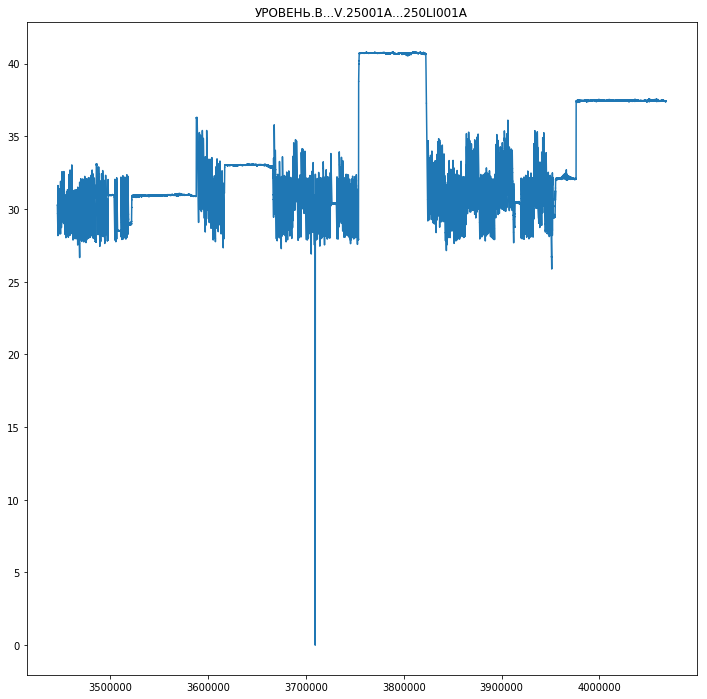

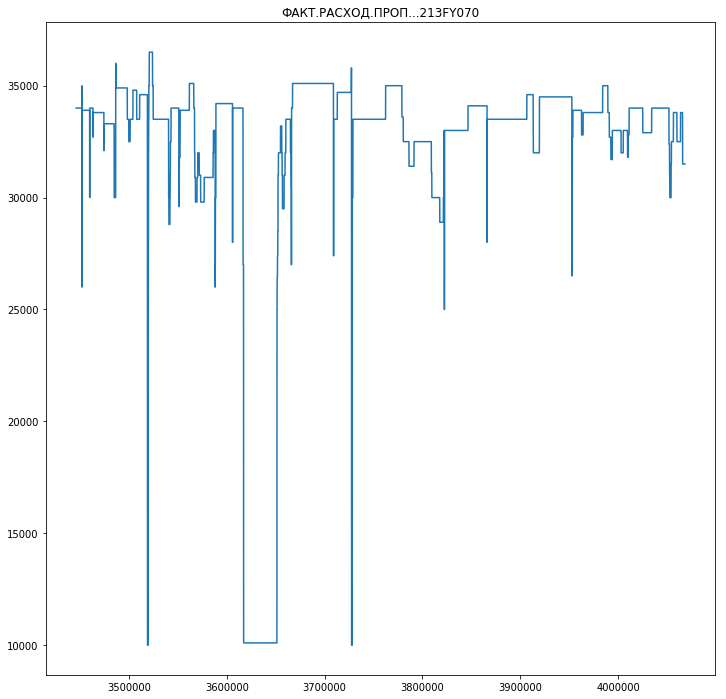

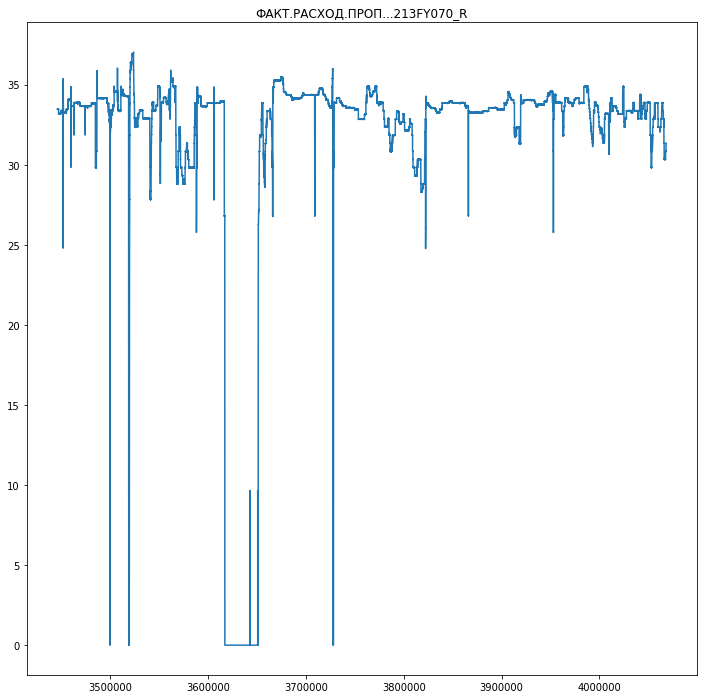

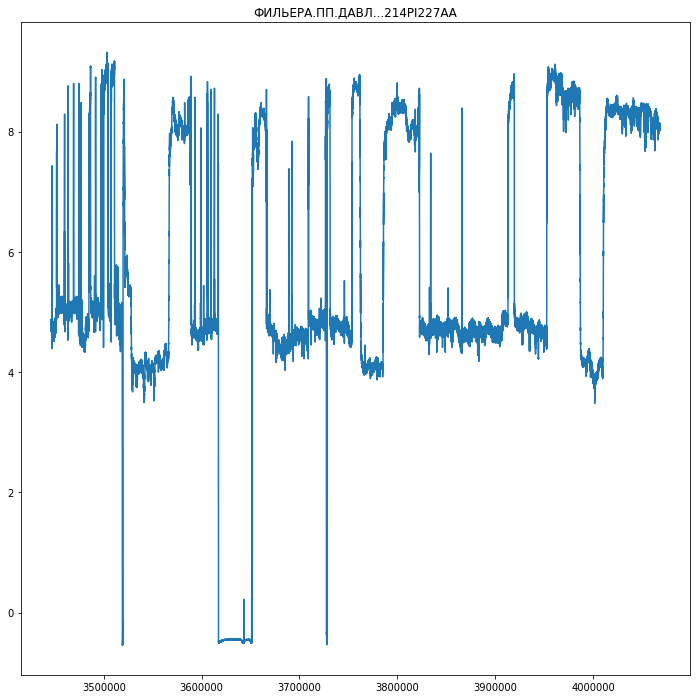

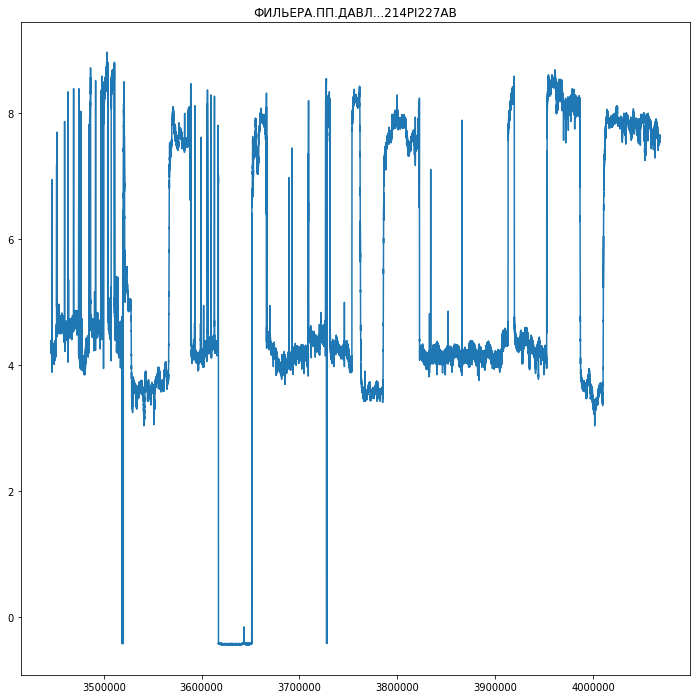

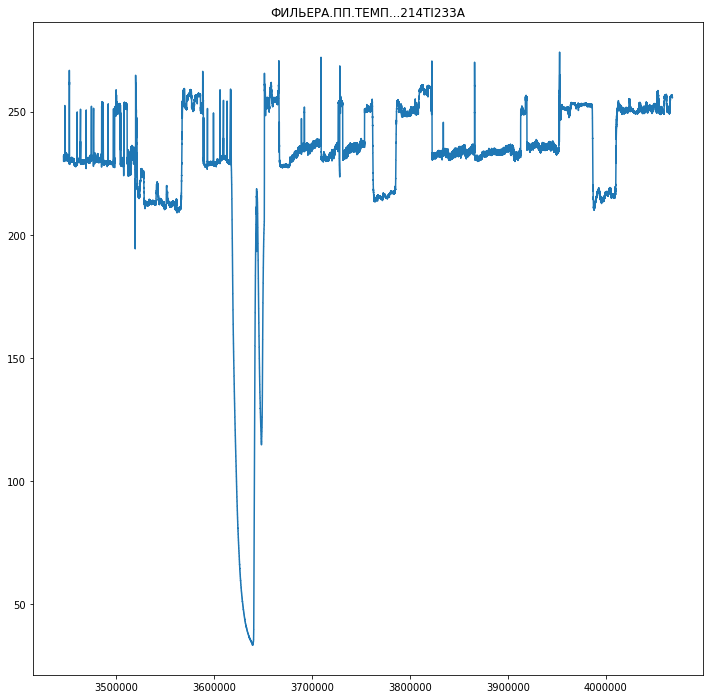

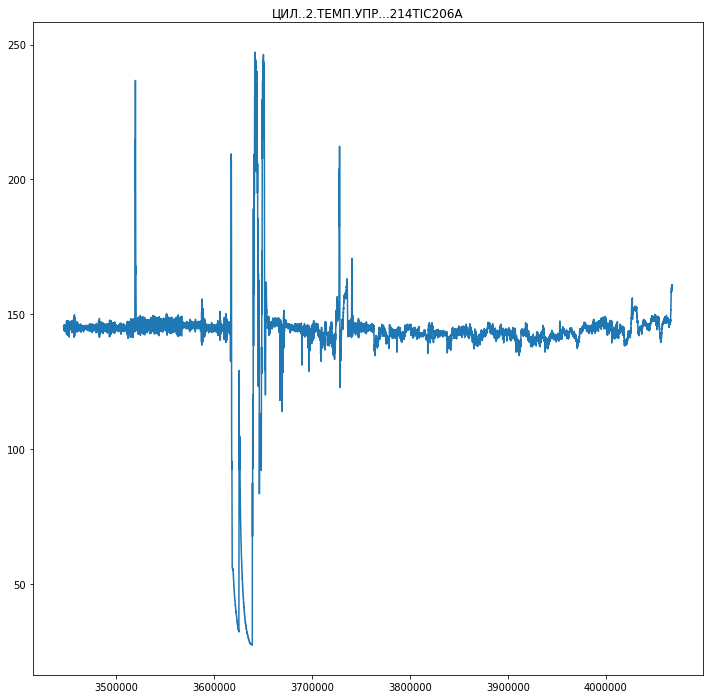

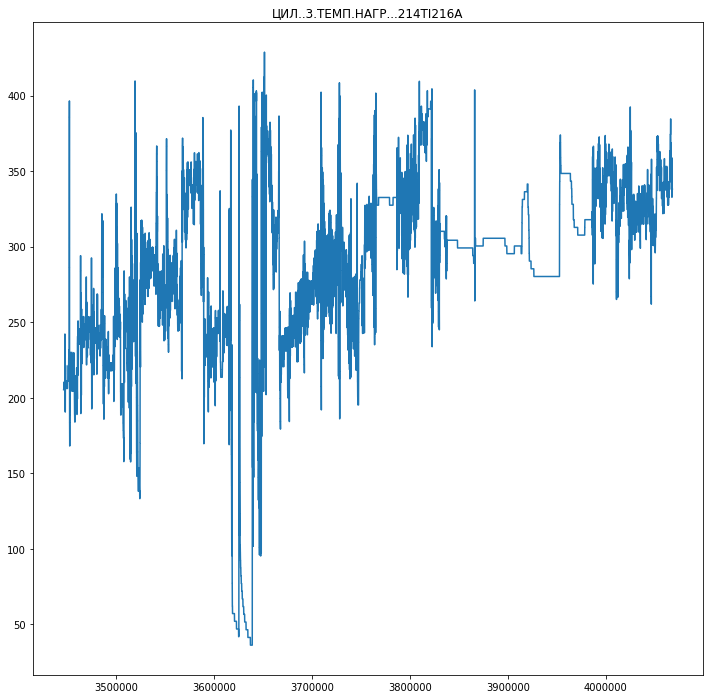

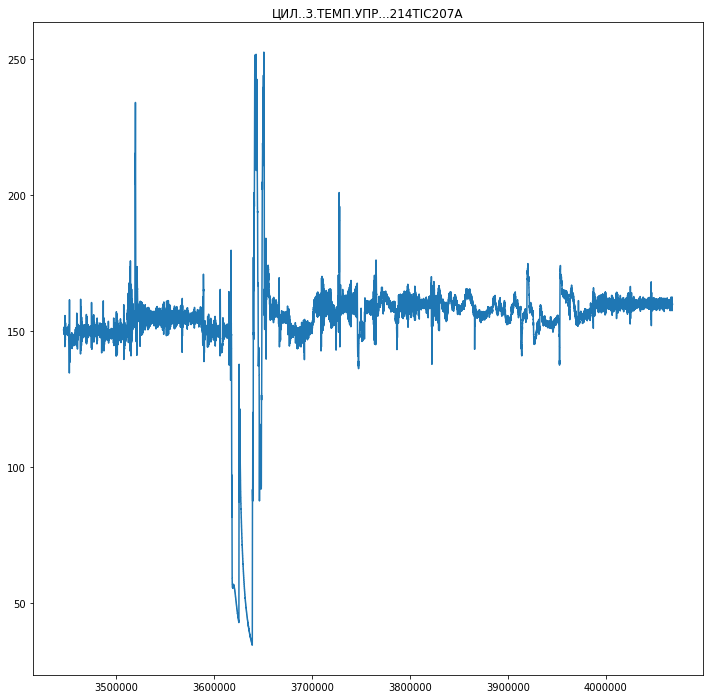

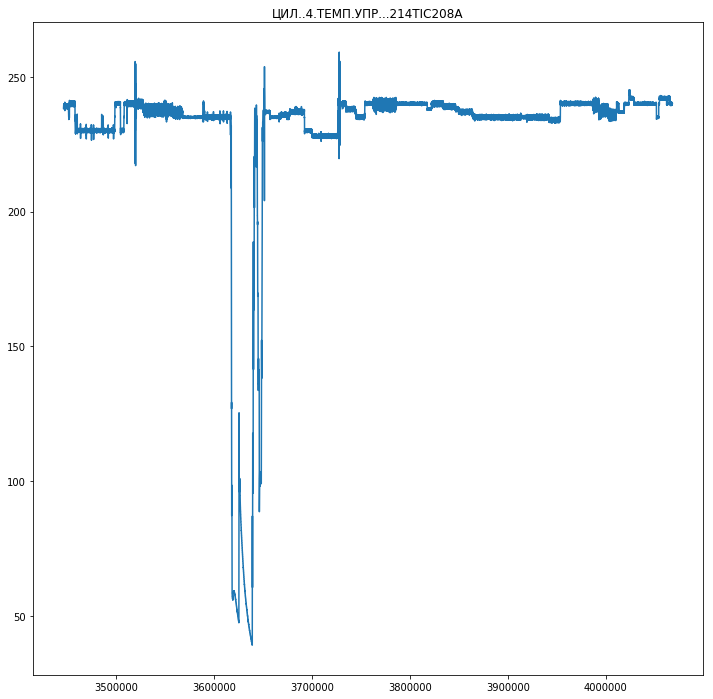

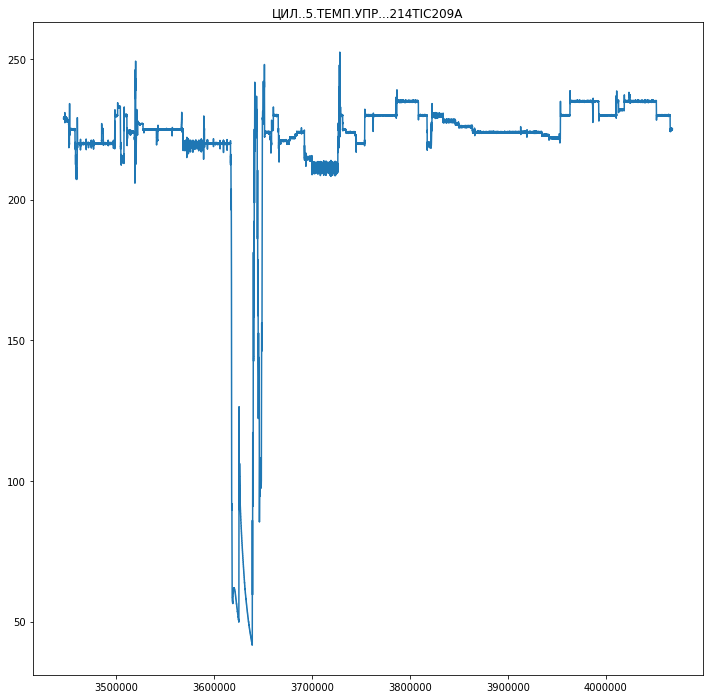

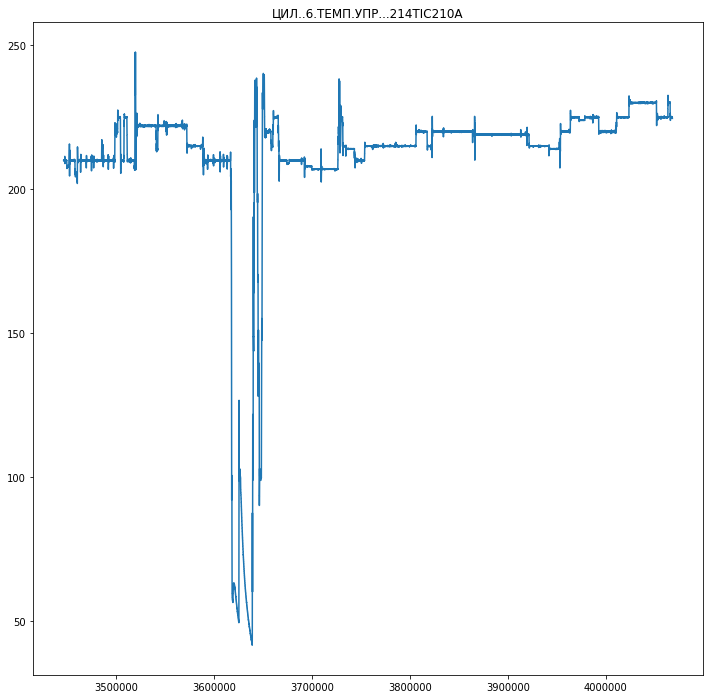

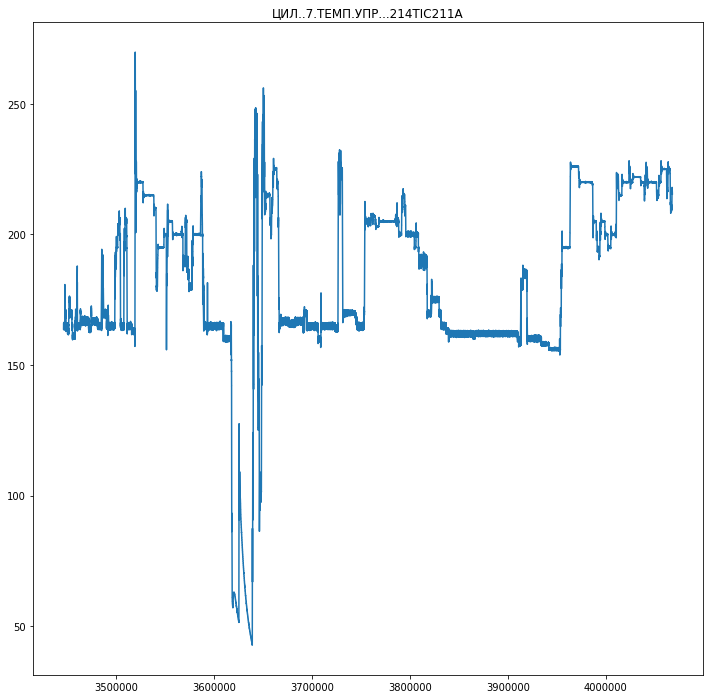

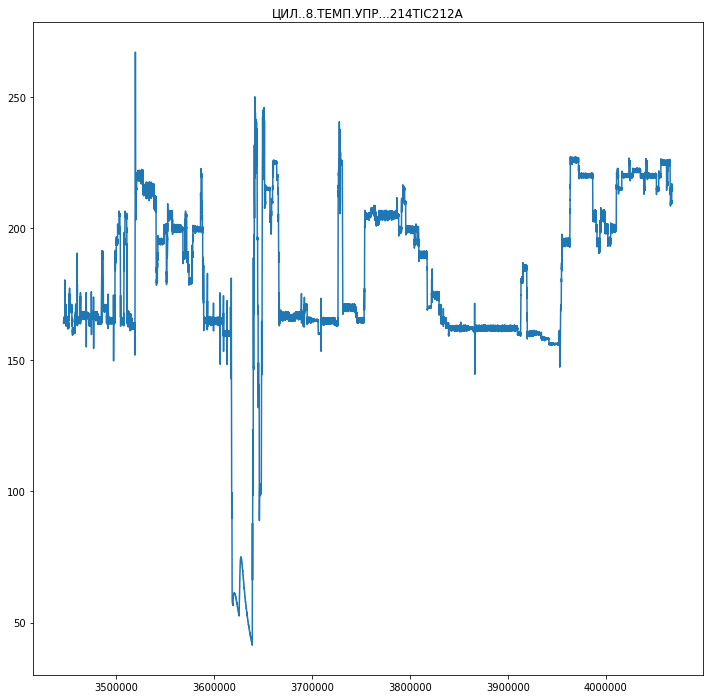

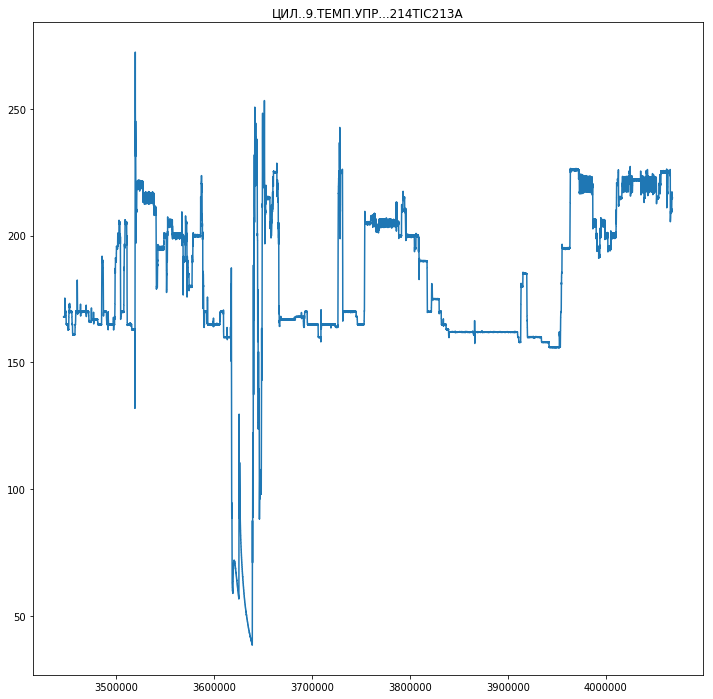

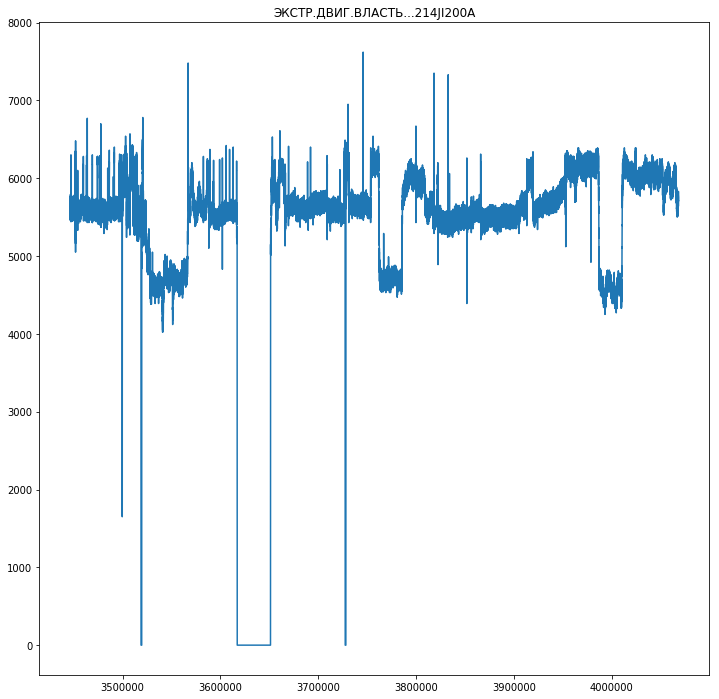

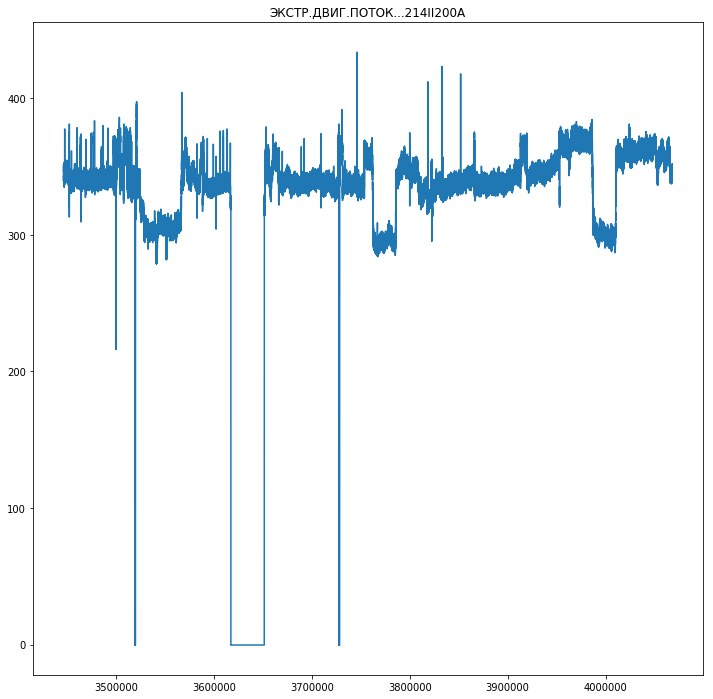

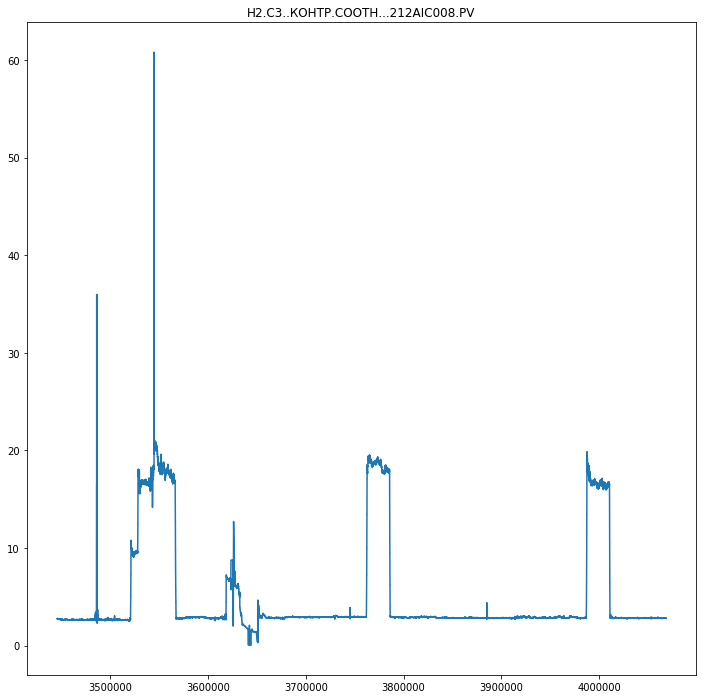

In [17]:
for col in df.columns:
    plt.figure(figsize=(12,12))
    plt.title(col)
    plt.plot(df[df.date > pd.Timestamp('2018-01-17 23:59:50')][col])
    plt.show()

In [19]:
corr = df.corr()

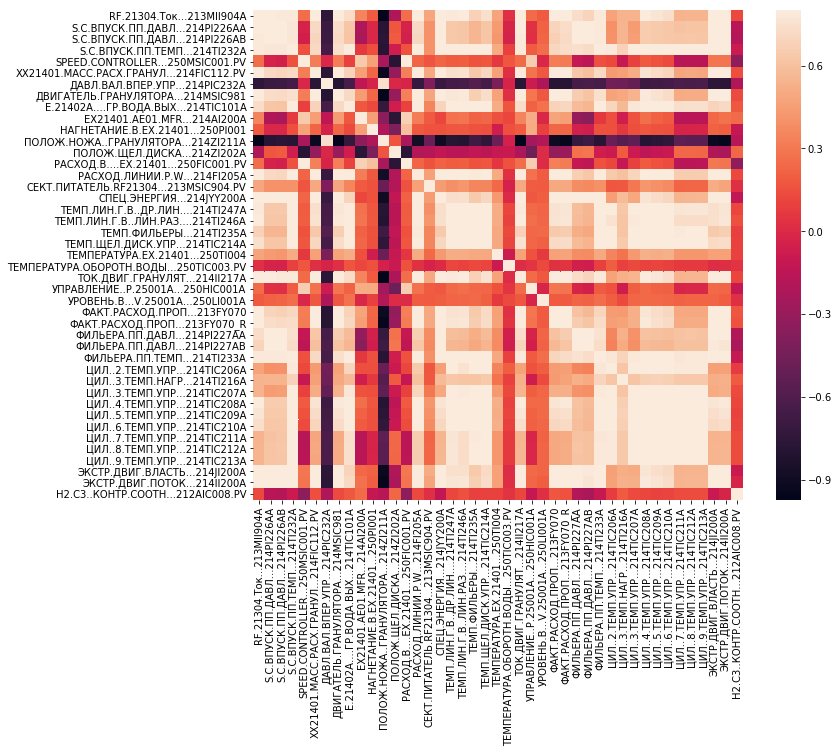

In [21]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RF.21304.Ток...213MII904A,3990419.0,4.542957,1.353436,0.000000,4.900000e+00,4.900000e+00,5.000000,14.600000
S.C.ВПУСК.ПП.ДАВЛ...214PI226AA,3916980.0,9.540525,3.762153,-0.480000,8.030000e+00,9.320000e+00,12.540000,17.920000
S.C.ВПУСК.ПП.ДАВЛ...214PI226AB,3916980.0,9.802087,3.872316,-0.460000,8.179999e+00,9.460000e+00,12.920000,19.580000
S.C.ВПУСК.ПП.ТЕМП...214TI232A,3916980.0,231.369473,44.315991,0.000000,2.308000e+02,2.388000e+02,254.600006,284.200012
SPEED.CONTROLLER...250MSIC001.PV,3912660.0,16.023257,19.223135,0.000000,0.000000e+00,0.000000e+00,38.799999,50.000000
XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV,3990419.0,29.893589,9.374987,0.000000,3.046340e+01,3.297135e+01,34.292179,61.458481
ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A,3916980.0,0.528986,0.066250,0.000000,4.870000e-01,5.141000e-01,0.546100,0.800000
ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981,3990419.0,398.292530,120.879333,-0.800000,4.069000e+02,4.351000e+02,453.399994,649.500000
Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A,3916980.0,48.527599,4.851267,0.000000,4.810000e+01,4.910000e+01,50.400002,73.900002
ЕХ21401.АЕ01.MFR...214AI200A,3990419.0,15.468673,13.279715,-0.100000,2.950000e+00,1.529000e+01,27.599998,46.509998
